In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/arsinta/OneDrive/Documents/DATA INTUISI.xlsx")
df.head()

,NO.,Nama BB/Balai/Loka pom,Nama,Alamat,Kab/Kota,Indeks Kepatuhan,Kategori,Keterangan,Hasil Temuan,Tindak Lanjut,Jenis Sarana
0,1,BALAI BESAR POM DI SURABAYA,Apotek Apotek Citra,Jl. Jenggolo No.62 Kab. Sidoarjo,Kabupaten Sidoarjo,NaN,D,Buruk,Memenuhi Ketentuan,Peringatan,Apotek
1,2,BALAI BESAR POM DI SURABAYA,Apotek Cipta Medika 1,"Jl. Balikpapan No.6 GKB, Kab. Gresik",Kabupaten Gresik,NaN,D,Buruk,Memenuhi Ketentuan,Peringatan,Apotek
2,3,BALAI BESAR POM DI SURABAYA,Apotek Christ (PRB BPJS),Jl Manyar Kertoadi No 81,Kota Surabaya,NaN,D,Buruk,Memenuhi Ketentuan,NaN,Apotek
3,4,BALAI BESAR POM DI SURABAYA,"Apotek Duta Farma, Apotek",Jl. Raya Dukuh Kupang 18 A,Kota Surabaya,NaN,D,Buruk,Memenuhi Ketentuan,Peringatan,Apotek
4,5,BALAI BESAR POM DI SURABAYA,"Apotek Pajajaran, Apotek",Jl. Pajajaran 12 Malang,Kota Malang,NaN,D,Buruk,Tidak Memenuhi Ketentuan,Peringatan Keras,Apotek


In [2]:
data = df.copy()

data = data[[
    "Jenis Sarana",
    "Indeks Kepatuhan",
    "Kategori",
    "Tindak Lanjut"
]]

In [3]:
data["Indeks Kepatuhan"] = pd.to_numeric(data["Indeks Kepatuhan"], errors="coerce")
data = data.dropna(subset=["Jenis Sarana", "Indeks Kepatuhan"])


In [4]:
indeks = data["Indeks Kepatuhan"]

mean_val = indeks.mean()
median_val = indeks.median()

print("Statistika Deskriptif Indeks Kepatuhan")
print(f"Mean   : {mean_val:.2f}")
print(f"Median : {median_val:.2f}")
print(f"Std    : {indeks.std():.2f}")
print(f"Min    : {indeks.min():.2f}")
print(f"Max    : {indeks.max():.2f}")
print(f"Jumlah : {indeks.count()}")

Statistika Deskriptif Indeks Kepatuhan
Mean   : 63.61
Median : 63.88
Std    : 18.39
Min    : 27.61
Max    : 91.87
Jumlah : 46


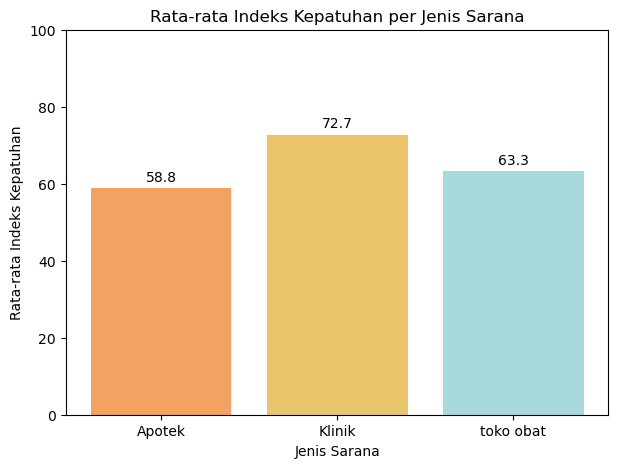

In [5]:
mean_per_sarana = data.groupby("Jenis Sarana")["Indeks Kepatuhan"].mean()

colors = ["#F4A261", "#E9C46A", "#A8DADC"]

plt.figure(figsize=(7,5))
bars = plt.bar(mean_per_sarana.index, mean_per_sarana.values, color=colors)
plt.title("Rata-rata Indeks Kepatuhan per Jenis Sarana")
plt.xlabel("Jenis Sarana")
plt.ylabel("Rata-rata Indeks Kepatuhan")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylim(0, 100)
plt.show()

In [6]:
df = pd.read_excel(
    "C:/Users/arsinta/OneDrive/Documents/SAMCODIN JAN-NOV 2025.xlsx",
    header=1
)

In [7]:
col = "Tujuan Penyaluran"

df[col] = df[col].astype(str).str.lower()

mask_apotek = df[col].str.contains(r"(apotek|apt\b|\bap\b)", regex=True)

df_apotek = df[mask_apotek].copy()
df_apotek["Kategori_Tujuan"] = "Apotek"


C:\Users\arsinta\AppData\Local\Temp\ipykernel_21224\2299672742.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_apotek = df[col].str.contains(r"(apotek|apt\b|\bap\b)", regex=True)


In [8]:
apotek_total = df_apotek["Kategori_Tujuan"].value_counts()
apotek_total

Kategori_Tujuan
Apotek    11187
Name: count, dtype: int64

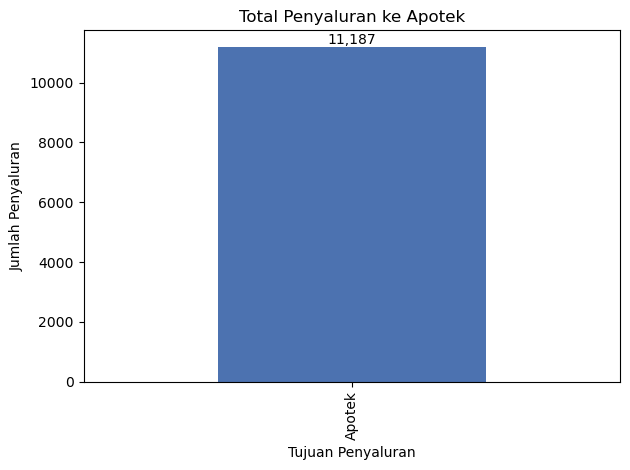

In [9]:
plt.figure()
bars = apotek_total.plot(kind="bar", color="#4C72B0")

plt.title("Total Penyaluran ke Apotek")
plt.xlabel("Tujuan Penyaluran")
plt.ylabel("Jumlah Penyaluran")

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()